In [1]:
import helper as hp

In [3]:
data = hp.minute_data_loading(pair='EURUSD', filtered=False)
data, og_feat_lab = hp.feature_calculation(data, final=True)

EURUSD BID Unfiltered Data Loaded
Features Calculated


In [43]:
import numpy as np
data["week"] = (data['Close'].shift(60*24*7) - data['Close']) * 100 / data['Close']
data.dropna(inplace=True)

label = data['week'].values
#label = np.where(label > 0, "up", "down")
features = data[og_feat_lab]

In [44]:
#apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features)
features = pca.transform(features)

print(features)

[[ 0.07153279 -4.47334886]
 [-0.31635807 -4.30425694]
 [-2.06818569 -3.55264882]
 ...
 [ 1.7124334   1.05204123]
 [ 1.7124056   1.05201786]
 [ 1.71237763  1.05199409]]


/tmp/ipykernel_16495/350810078.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


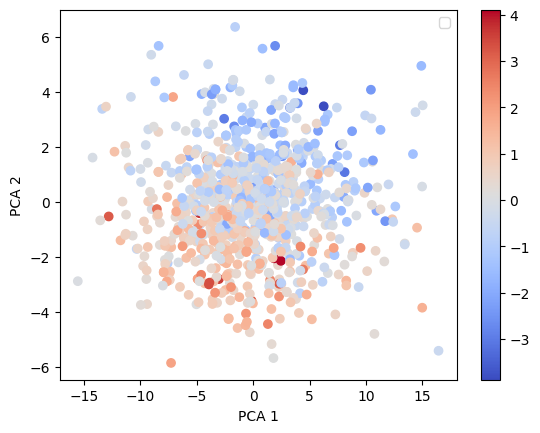

In [47]:
#choose 1000 random samples
np.random.seed(42)
indices = np.random.choice(range(len(features)), 1000)
features_sample = features[indices]
label_sample = label[indices]

#plotting with categories
import matplotlib.pyplot as plt
""" up_index = np.where(label_sample == "up")
down_index = np.where(label_sample == "down")
plt.scatter(features_sample[up_index, 0], features_sample[up_index, 1], c='r', label='up', alpha=0.5, s=10)
plt.scatter(features_sample[down_index, 0], features_sample[down_index, 1], c='b', label='down', alpha=0.5, s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show() """

plt.scatter(features_sample[:,0], features_sample[:,1], c=label_sample, cmap='coolwarm')
#add color name
plt.colorbar()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()